In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df =  pd.read_csv("dataset.csv")

In [4]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: >

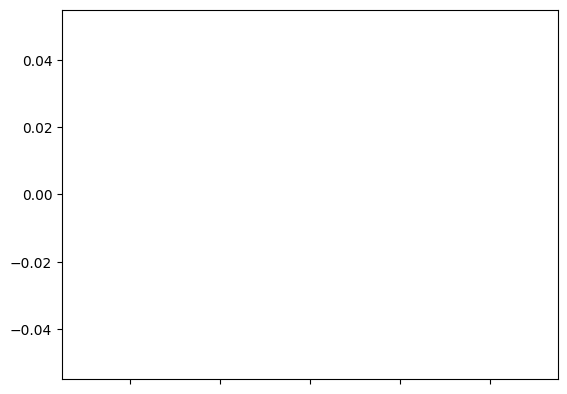

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Identify features with missing values
features_with_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

# Calculate percentage of missing values
missing_percent = df[features_with_na].isnull().mean() * 100
missing_percent.plot()

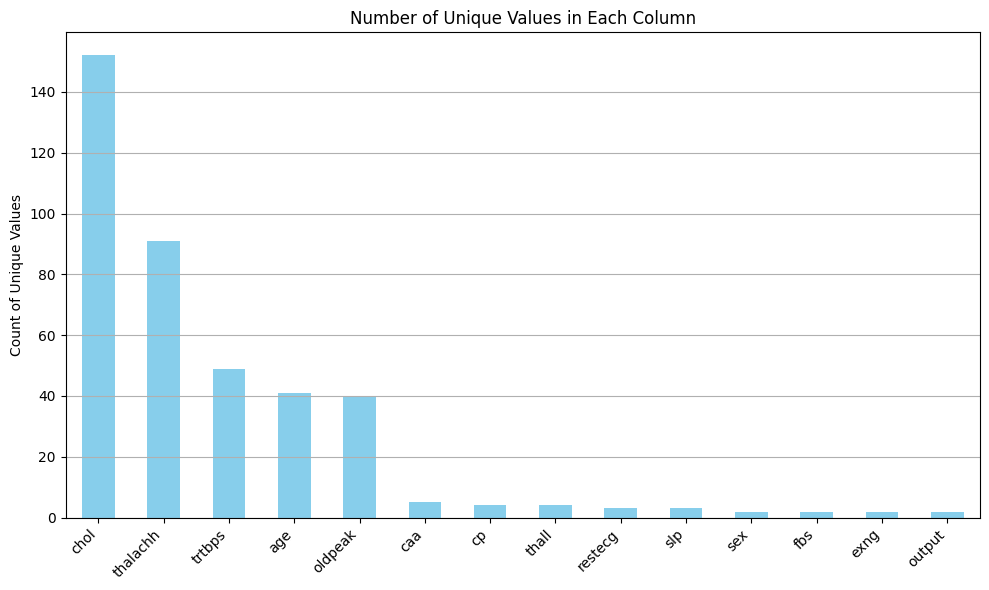

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Count unique values in each column
unique_values = df.nunique()

# Plot the result
plt.figure(figsize=(10, 6))
unique_values.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Number of Unique Values in Each Column")
plt.ylabel("Count of Unique Values")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


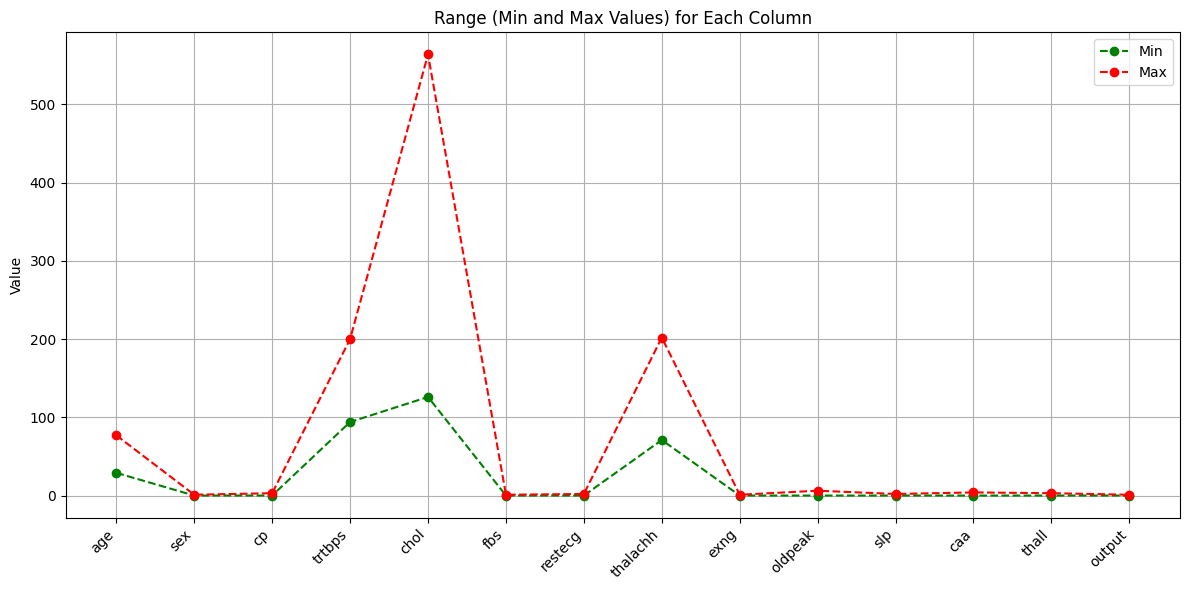

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Get min and max values for each column
column_range = df.describe().loc[['min', 'max']]

# Transpose for better plotting
column_range = column_range.transpose()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(column_range['min'], label='Min', marker='o', linestyle='--', color='green')
plt.plot(column_range['max'], label='Max', marker='o', linestyle='--', color='red')
plt.title("Range (Min and Max Values) for Each Column")
plt.ylabel("Value")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


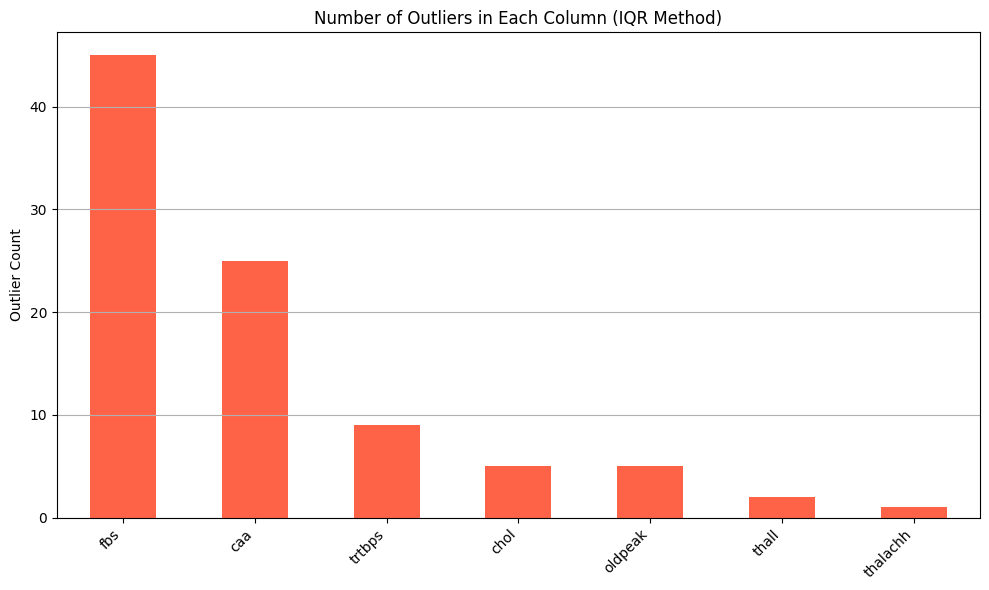

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Q1, Q3, IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect and count outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()

# Plot
plt.figure(figsize=(10, 6))
outliers[outliers > 0].sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title("Number of Outliers in Each Column (IQR Method)")
plt.ylabel("Outlier Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


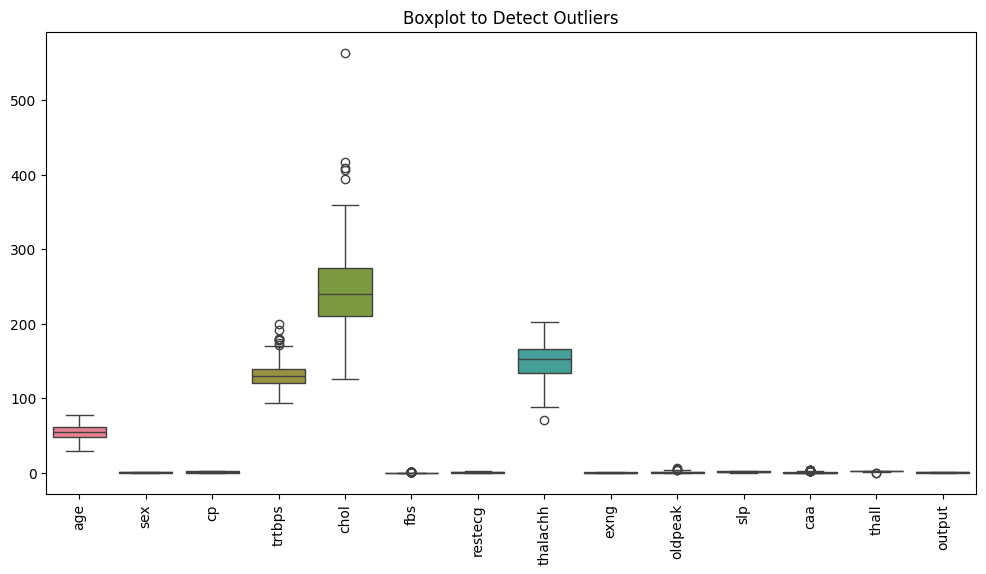

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot to Detect Outliers")
plt.show()

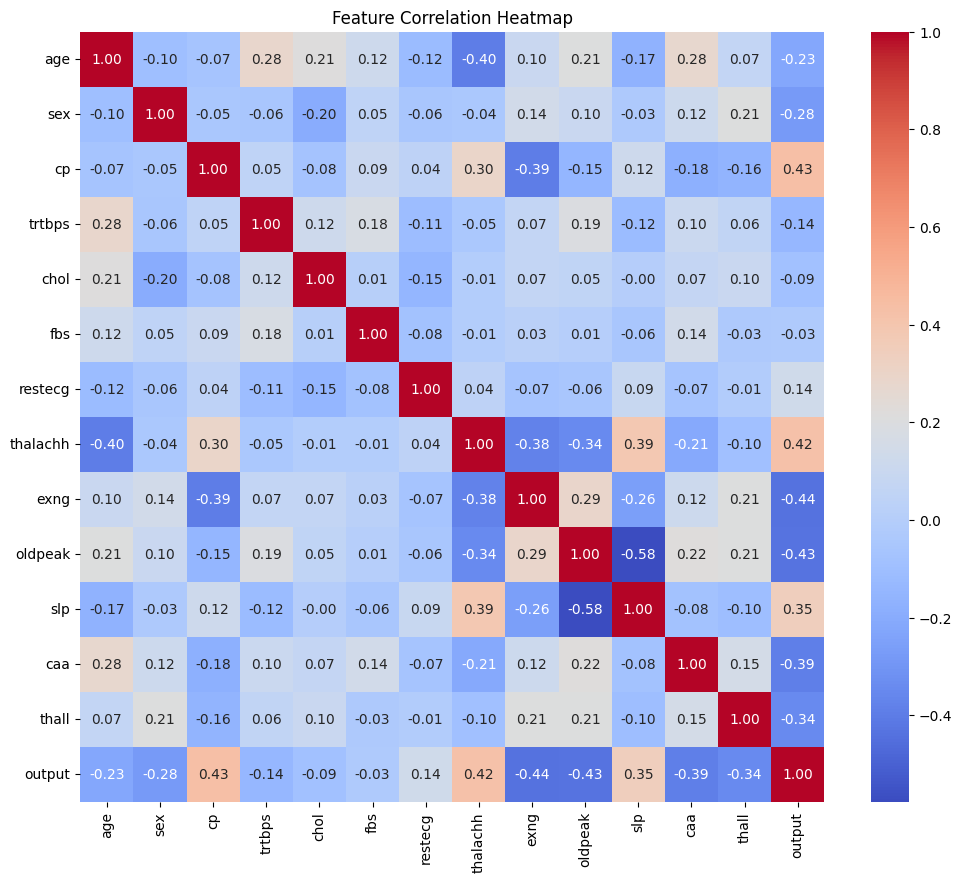

Highly Correlated Features: set()


In [5]:
# Compute correlation matrix for training data
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Function to remove highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set to store correlated column names
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check if correlation exceeds threshold
                colname = corr_matrix.columns[i]  # Get correlated column name
                col_corr.add(colname)
    return col_corr

# Identify highly correlated features (e.g., threshold = 0.8)
high_corr_features = correlation(df, 0.8)
print("Highly Correlated Features:", high_corr_features)

In [4]:
# Compute correlation matrix
corr_matrix = df.corr()

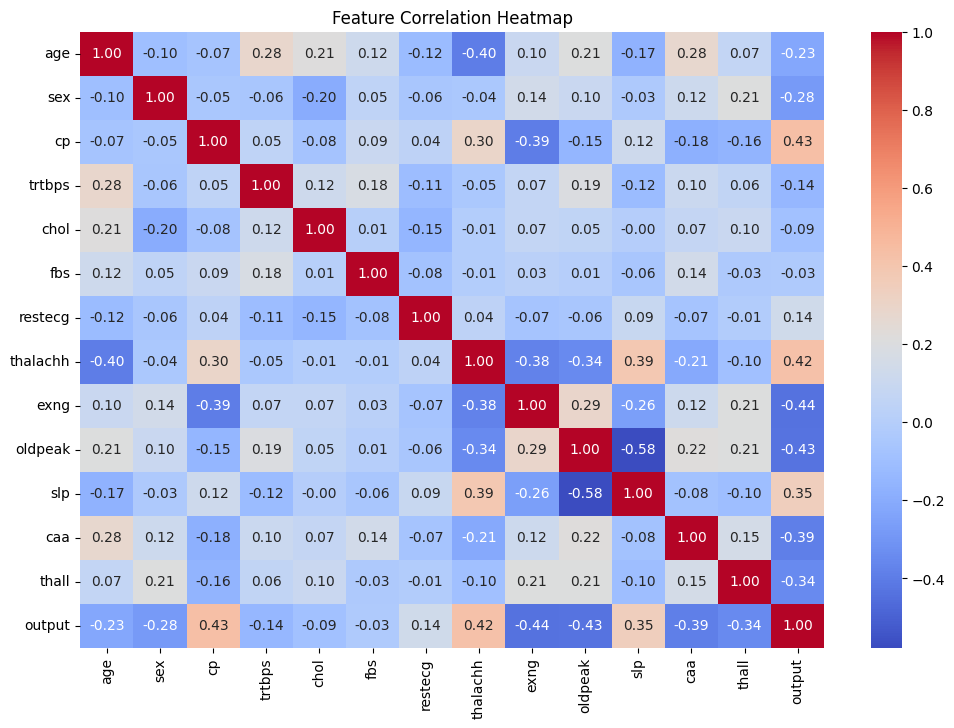

In [5]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


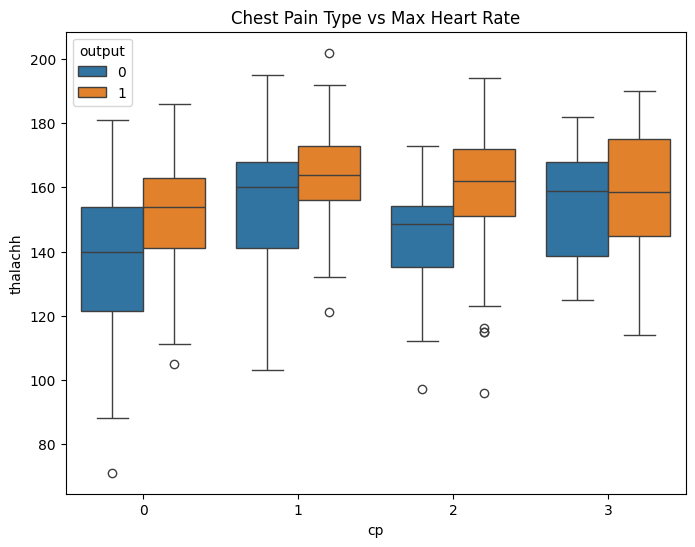

In [9]:
# Best relationships analysis
# 1. Boxplot of chest pain type vs output
plt.figure(figsize=(8, 6))
sns.boxplot(x="cp", y="thalachh", hue="output", data=df)
plt.title("Chest Pain Type vs Max Heart Rate")
plt.show()


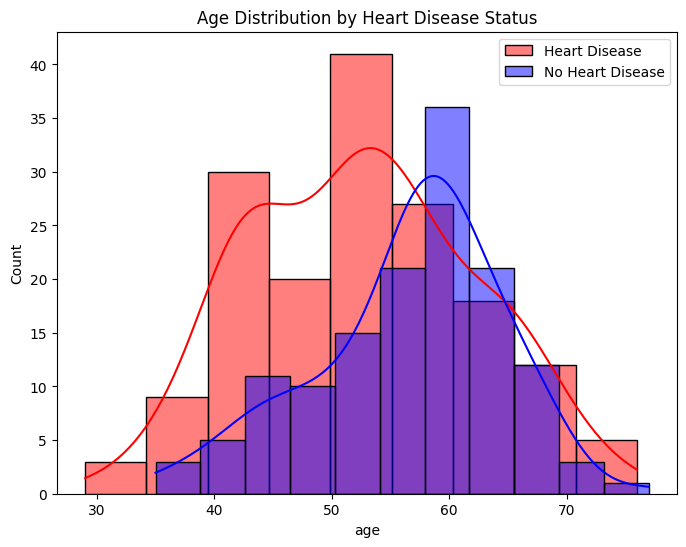

In [10]:
# 2. Distribution of age among patients with and without disease
plt.figure(figsize=(8, 6))
sns.histplot(df[df["output"] == 1]["age"], color="red", kde=True, label="Heart Disease")
sns.histplot(df[df["output"] == 0]["age"], color="blue", kde=True, label="No Heart Disease")
plt.legend()
plt.title("Age Distribution by Heart Disease Status")
plt.show()


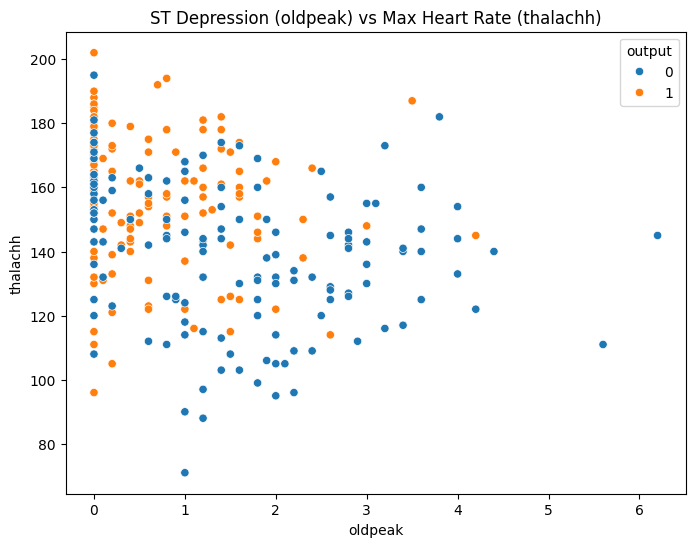

In [11]:
# 3. Scatter plot between oldpeak and thalachh
plt.figure(figsize=(8, 6))
sns.scatterplot(x="oldpeak", y="thalachh", hue="output", data=df)
plt.title("ST Depression (oldpeak) vs Max Heart Rate (thalachh)")
plt.show()

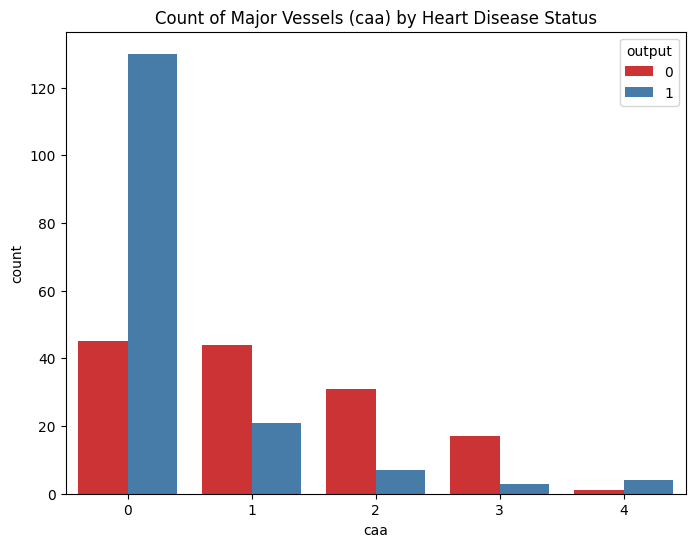

In [12]:

# 4. Countplot for number of major vessels colored by target
plt.figure(figsize=(8, 6))
sns.countplot(x="caa", hue="output", data=df, palette="Set1")
plt.title("Count of Major Vessels (caa) by Heart Disease Status")
plt.show()


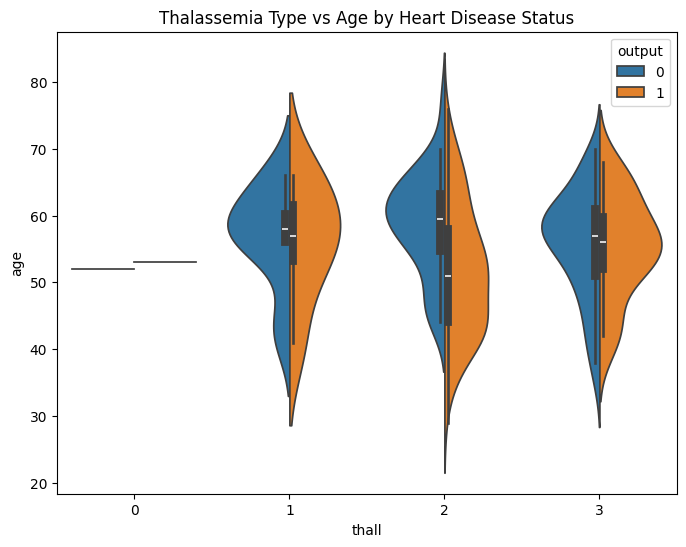

In [13]:
# 5. Violin plot for thall vs output
plt.figure(figsize=(8, 6))
sns.violinplot(x="thall", y="age", hue="output", data=df, split=True)
plt.title("Thalassemia Type vs Age by Heart Disease Status")
plt.show()